In [2]:
# importing neccessary libraries
from glob import glob
import numpy as np
import pandas as pd
import random
from skimage.io import imread
import os, shutil
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input
from collections import Counter
from scikitplot.metrics import plot_roc
from sklearn import metrics
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import scikitplot
import sklearn
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import validation_curve
import imblearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score, recall_score, accuracy_score, f1_score, make_scorer, classification_report, auc, roc_curve, roc_auc_score, confusion_matrix
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from keras.applications import MobileNet, DenseNet201, DenseNet121, VGG19, InceptionV3, MobileNetV2, Xception, ResNet152V2, NASNetLarge
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
%matplotlib inline

# Data Processessing

In [4]:
# counting the amount of x rays images
len_pneumonia_train = len([iq for iq in os.scandir('xrays/covidvspneumonia/train/pneumonia')])
len_pneumonia_val = len([iq for iq in os.scandir('xrays/covidvspneumonia/val/pneumonia')])
len_pneumonia_test = len([iq for iq in os.scandir('xrays/covidvspneumonia/test/pneumonia')])

len_covid_train = len([iq for iq in os.scandir('xrays/covidvspneumonia/train/covid')])
len_covid_val = len([iq for iq in os.scandir('xrays/covidvspneumonia/val/covid')])
len_covid_test = len([iq for iq in os.scandir('xrays/covidvspneumonia/test/covid')])


len_train_total = len_covid_train + len_pneumonia_train
len_val_total = len_pneumonia_val + len_covid_val
len_test_total = len_covid_test + len_pneumonia_test

print("Total")
print("---------------------")
print ("pneumonia no train: ", len_pneumonia_train)
print ("pneumonia no val: ", len_pneumonia_val)
print ("pneumonia no test: ", len_pneumonia_test)
print("---------------------")
print ("covid no train: ", len_covid_train)
print ("covid no val: ", len_covid_val)
print ("covid no test: ", len_covid_test)
print()
print("Total")
print("---------------------")
print("total train: ", len_train_total)
print("total val: ", len_val_total)
print("total test: ", len_test_total)


Total
---------------------
pneumonia no train:  845
pneumonia no val:  226
pneumonia no test:  270
---------------------
covid no train:  666
covid no val:  167
covid no test:  39

Total
---------------------
total train:  1511
total val:  393
total test:  309


In [6]:
# extracting the images
DIR_NAME = 'xrays/covidvspneumonia/'

imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
        imagePaths.append(os.path.join(dirname, filename))

In [7]:
# verifying if the images have been extracted
imagePaths

['xrays/covidvspneumonia/test\\covid\\COVID-19(152).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(153).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(154).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(155).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(156).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(157).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(158).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(159).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(160).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(161).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(162).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(163).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(164).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(165).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(166).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(167).png',
 'xrays/covidvspneumonia/test\\covid\\COVID-19(168).png',
 'xrays/covidv

In [8]:
# assigining the labels to the images
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [9]:
# verifying the shape
data.shape

(2213, 64, 64, 3)

In [10]:
# verifying the labels
labels

array(['covid', 'covid', 'covid', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype='<U9')

In [11]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)


# Data Augmentation

In [12]:
# Data Augmentation
def process_data(x_train,y_train, x_test,y_test, batch_size):
    #to prevent overfitting
    train_datagen = ImageDataGenerator(shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range=0.2)


    validation_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow(x_train,y_train,
                                                        batch_size=batch_size)

    validation_generator = validation_datagen.flow(x_test,y_test,
                                                  batch_size=batch_size)



    return train_generator, validation_generator 

# Transfer Learning

In [17]:
# adding top layer
def addTopModel(bottom_model, num_classes):
    top_model = bottom_model.output
    #top_model = AveragePooling2D(pool_size=(2, 2))(top_model)
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(512, activation="relu")(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(2, activation='sigmoid')(top_model)
    
    model = Model(inputs=bottom_model.input, outputs=top_model)
    
    return model

def get_model(transferleaner,x_train,y_train, x_test,y_test):
    model = addTopModel(m, num_classes) 

    for layer in m.layers:
        layer.trainable = False


        #data augmentation
    train_generator, validation_generator = process_data(x_train,y_train,
                                                     x_test,y_test, batch_size)


    model.summary()

    checkpoint = ModelCheckpoint(data_dir+'modelcnp' + '.h5',
                                 monitor='val_loss',
                                 mode="min",
                                 save_best_only=True,
                                 verbose=1)

    earlystop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=30,
                              verbose=1,
                              restore_best_weights=True)

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                                patience=30,
                                                verbose=1,
                                                factor=0.8,
                                                min_lr=0.0001,
                                                mode="auto",
                                                min_delta=0.0001,
                                                cooldown=5)

    callbacks = [checkpoint, earlystop, learning_rate_reduction]

    model.compile(loss=models_loss,
                  optimizer=models_opt,
                  metrics=['accuracy'])


    model.fit(train_generator,
                                 epochs=epochs,
                                   callbacks=callbacks,
                                  validation_data=(x_test, y_test),
                                  validation_steps=len(x_test) / batch_size,
                                  steps_per_epoch=len(x_train) / batch_size)

    history = model.fit(train_generator,
                                    epochs=epochs,
                                  callbacks=callbacks,
                                  validation_data=(x_test, y_test),
                                  validation_steps=len(x_test) / batch_size,
                                  steps_per_epoch=len(x_train) / batch_size)
    return model, history

# Confusion Matrix

In [13]:
# plotting confusion matrix for testing
def plot_confusion_matrix(model, x_test, y_test):
    fig, ax = plt.subplots(figsize=(8,6))

    classes =  ['PNEUMONIA','COVID']
    
    y_pred = model.predict(x_test, batch_size=batch_size)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1) 
    
    print('Confusion Matrix')
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    sns.heatmap(cm,cmap='Purples',fmt='g', annot=True)
    tick_marks = [0.5,1.5]
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.title('Confusion Matrix - Normalized')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    bottom, top = ax.get_ylim()
    
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    plt.show()
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    
    print("Precision Score: {}".format(precision))
    print("Recall Score: {}".format(recall))
    print("F1 Score: {}".format(f1))
    print("Accuracy Score: {}".format(acc))

    return plt.show()

# ROC AUC

In [14]:
#ROC curve
def multiclass_roc_auc_score(x_test, y_test, model, average="micro"):
    

    y_pred = model.predict(x_test, batch_size=batch_size)
    
    # Convert to Binary classes
    y_pred_bin = np.argmax(y_pred, axis=1)
    y_test_bin = np.argmax(y_test, axis=1)

    
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
    
    auc_keras = auc(fpr, tpr)
    
    print('AUC: {}'.format(auc_keras))    
    print('Log Loss: {}'.format(metrics.log_loss(y_test.argmax(axis=1), y_pred)))

        
    plt.plot(fpr, tpr,  color='darkorange', label='ROC curve (area = %0.2f)' % auc_keras)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for our model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best', fancybox=True)
    plt.grid(True)


    return plt.show()

# Model Loss

In [15]:
#model loss
def plot_learning_curves(r):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(r.history['loss'])
    plt.plot(r.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(r.history['accuracy'])
    plt.plot(r.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    return plt.show()

# Assigning Parameters

In [16]:
#parameters
data_dir = '/'
version = '-v5-'
num_classes = 2
ig_size= 64
epochs = 100
batch_size = 32

models_loss = 'binary_crossentropy'
models_opt = 'adam' #Adam(lr=0.001, decay=0.001/600) #SGD(learning_rate=0.001, momentum=0.9) #ADAM(lr=0.001)

# Modelling

In [19]:
# assiging the VGG16 model
m = VGG19(weights="imagenet", include_top=False, 
          input_tensor=Input(shape=(64, 64, 3)))


model = addTopModel(m, num_classes) 

for layer in m.layers:
    layer.trainable = False
 

    #data augmentation
train_generator, validation_generator = process_data(x_train,y_train,
                                                 x_test,y_test, batch_size)


model.summary()

checkpoint = ModelCheckpoint(data_dir+'modelcnp' + '.h5',
                             monitor='val_loss',
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=30,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=30,
                                            verbose=1,
                                            factor=0.8,
                                            min_lr=0.0001,
                                            mode="auto",
                                            min_delta=0.0001,
                                            cooldown=5)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss=models_loss,
              optimizer=models_opt,
              metrics=['accuracy'])


model.fit(train_generator,
                             epochs=epochs,
                               callbacks=callbacks,
                              validation_data=(x_test, y_test),
                              validation_steps=len(x_test) / batch_size,
                              steps_per_epoch=len(x_train) / batch_size)

history = model.fit(train_generator,
                                epochs=epochs,
                              callbacks=callbacks,
                              validation_data=(x_test, y_test),
                              validation_steps=len(x_test) / batch_size,
                              steps_per_epoch=len(x_train) / batch_size)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

Epoch 16/100
56/55 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9395
Epoch 00016: val_loss improved from 0.08158 to 0.08087, saving model to /modelcnp.h5
56/55 [==============================] - 82s 1s/step - loss: 0.1506 - accuracy: 0.9395 - val_loss: 0.0809 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 17/100
56/55 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9328
Epoch 00017: val_loss improved from 0.08087 to 0.07921, saving model to /modelcnp.h5
56/55 [==============================] - 81s 1s/step - loss: 0.1638 - accuracy: 0.9328 - val_loss: 0.0792 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 18/100
56/55 [==============================] - ETA: 0s - loss: 0.1597 - accuracy: 0.9373
Epoch 00018: val_loss did not improve from 0.07921
56/55 [==============================] - 79s 1s/step - loss: 0.1597 - accuracy: 0.9373 - val_loss: 0.0924 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 19/100
56/55 [==============================] - ETA: 0s - l

Epoch 44/100
56/55 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9548
Epoch 00044: val_loss did not improve from 0.06854
56/55 [==============================] - 80s 1s/step - loss: 0.1212 - accuracy: 0.9548 - val_loss: 0.0772 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 45/100
56/55 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9486
Epoch 00045: val_loss did not improve from 0.06854
56/55 [==============================] - 76s 1s/step - loss: 0.1351 - accuracy: 0.9486 - val_loss: 0.0839 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 46/100
56/55 [==============================] - ETA: 0s - loss: 0.1543 - accuracy: 0.9390
Epoch 00046: val_loss did not improve from 0.06854
56/55 [==============================] - 76s 1s/step - loss: 0.1543 - accuracy: 0.9390 - val_loss: 0.0701 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 47/100
56/55 [==============================] - ETA: 0s - loss: 0.1294 - accuracy: 0.9514
Epoch 00047: val_loss did not improve

Epoch 4/100
56/55 [==============================] - ETA: 0s - loss: 0.1288 - accuracy: 0.9542
Epoch 00004: val_loss did not improve from 0.06854
56/55 [==============================] - 74s 1s/step - loss: 0.1288 - accuracy: 0.9542 - val_loss: 0.0778 - val_accuracy: 0.9729 - lr: 8.0000e-04
Epoch 5/100
56/55 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9525
Epoch 00005: val_loss did not improve from 0.06854
56/55 [==============================] - 76s 1s/step - loss: 0.1259 - accuracy: 0.9525 - val_loss: 0.0811 - val_accuracy: 0.9752 - lr: 8.0000e-04
Epoch 6/100
56/55 [==============================] - ETA: 0s - loss: 0.1152 - accuracy: 0.9542
Epoch 00006: val_loss did not improve from 0.06854
56/55 [==============================] - 77s 1s/step - loss: 0.1152 - accuracy: 0.9542 - val_loss: 0.0853 - val_accuracy: 0.9752 - lr: 8.0000e-04
Epoch 7/100
56/55 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9480
Epoch 00007: val_loss did not

Epoch 32/100
56/55 [==============================] - ETA: 0s - loss: 0.0979 - accuracy: 0.9633
Epoch 00032: val_loss did not improve from 0.06854
56/55 [==============================] - 85s 2s/step - loss: 0.0979 - accuracy: 0.9633 - val_loss: 0.0804 - val_accuracy: 0.9707 - lr: 8.0000e-04
Epoch 33/100
56/55 [==============================] - ETA: 0s - loss: 0.1198 - accuracy: 0.9492
Epoch 00033: val_loss did not improve from 0.06854
56/55 [==============================] - 84s 1s/step - loss: 0.1198 - accuracy: 0.9492 - val_loss: 0.0801 - val_accuracy: 0.9752 - lr: 8.0000e-04
Epoch 34/100
56/55 [==============================] - ETA: 0s - loss: 0.1216 - accuracy: 0.9503
Epoch 00034: val_loss did not improve from 0.06854
56/55 [==============================] - 84s 1s/step - loss: 0.1216 - accuracy: 0.9503 - val_loss: 0.0849 - val_accuracy: 0.9752 - lr: 8.0000e-04
Epoch 35/100
56/55 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9458
Epoch 00035: val_loss did

Epoch 60/100
56/55 [==============================] - ETA: 0s - loss: 0.1078 - accuracy: 0.9621
Epoch 00060: val_loss did not improve from 0.06854
56/55 [==============================] - 74s 1s/step - loss: 0.1078 - accuracy: 0.9621 - val_loss: 0.1092 - val_accuracy: 0.9729 - lr: 8.0000e-04
Epoch 61/100
56/55 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.9525
Epoch 00061: val_loss did not improve from 0.06854
56/55 [==============================] - 74s 1s/step - loss: 0.1165 - accuracy: 0.9525 - val_loss: 0.0863 - val_accuracy: 0.9752 - lr: 8.0000e-04
Epoch 62/100
56/55 [==============================] - ETA: 0s - loss: 0.1000 - accuracy: 0.9678
Epoch 00062: val_loss did not improve from 0.06854
56/55 [==============================] - 74s 1s/step - loss: 0.1000 - accuracy: 0.9678 - val_loss: 0.0968 - val_accuracy: 0.9774 - lr: 8.0000e-04
Epoch 63/100
56/55 [==============================] - ETA: 0s - loss: 0.1320 - accuracy: 0.9503
Epoch 00063: val_loss did

# Testing

Confusion Matrix


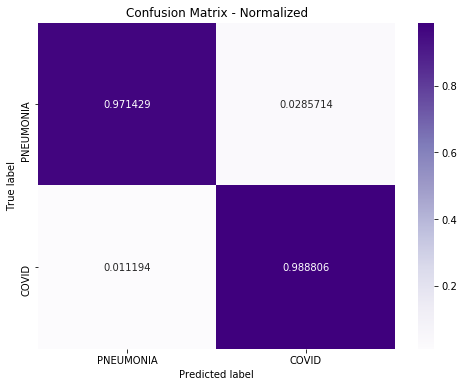

Precision Score: [0.98265896 0.98148148]
Recall Score: [0.97142857 0.98880597]
F1 Score: [0.97701149 0.98513011]
Accuracy Score: 0.981941309255079


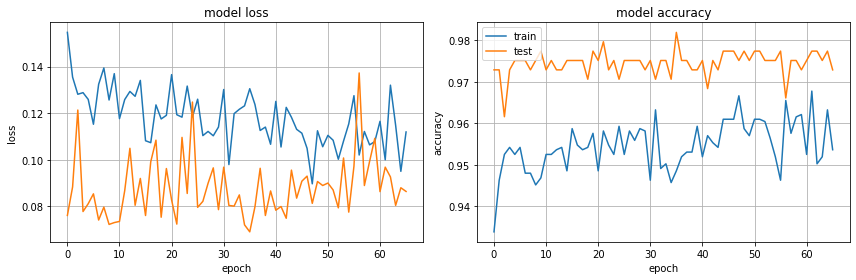

AUC: 0.9801172707889125
Log Loss: 0.06902558004821986


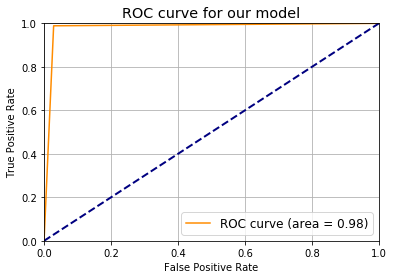

In [20]:
## Confusion matrix
plot_confusion_matrix(model, x_test, y_test)
## Learning curve
plot_learning_curves(history)
## ROC AUC
multiclass_roc_auc_score(x_test, y_test, model)

In [21]:
# saving model
model.save("modelcnp.h5")